In [1]:
# create a pipeline to process lots of TFs, 
#train regresion models of them, 
#and then do some post procesing

import os
import sys
sys.path.append('/home/kal/TF_models/bin/')
os.environ['CUDA_VISIBLE_DEVICES'] = '1' # Must be before importing keras!
import tf_memory_limit

from keras import backend as K
from keras.models import load_model, Model, Input
from keras.layers import Input, Lambda, Conv1D

import numpy as np
import matplotlib.pylab as plt 
from sklearn.metrics import precision_recall_curve
from scipy.integrate import trapz
from tqdm import tqdm
import ucscgenome
import math
import pandas as pd
import time
import pickle
import importlib

import sequence
import train_TFmodel
import eval_TFmodel
import ctcfgen
import seq_only_gen
import train_seq_regression_convnet

Using TensorFlow backend.
/home/kal/TF_models/bin/sequence.py:275: RuntimeWarning: divide by zero encountered in log
  self.seq = helper.softmax(np.log(dist))


In [2]:
# get a list of all the tf's I might use
bed_path = '/home/kal/TF_models/data/encode_chipseq_peaks.bed'
full = pd.read_table(bed_path, header=None)
full.columns = 'chr start end name score expCount expNums expScores'.split()
TFs = full.name.unique()
print(TFs)

['ZBTB33' 'CEBPB' 'CTCF' 'TAF1' 'GABPA' 'USF1' 'SP1' 'EGR1' 'FOXA1'
 'RUNX3' 'MAZ' 'RAD21' 'SMC3' 'MAFF' 'MAFK' 'BHLHE40' 'FOSL2' 'JUND'
 'E2F6' 'MAX' 'POLR2A' 'PAX5' 'PHF8' 'PML' 'YY1' 'SIN3AK20' 'E2F1'
 'GTF2F1' 'ATF2' 'MYC' 'KDM5A' 'MXI1' 'POU2F2' 'KDM5B' 'TBP' 'IRF1'
 'EP300' 'TAF7' 'ELK1' 'RFX5' 'TCF7L2' 'CHD2' 'FOXP2' 'ATF3' 'BRCA1'
 'NFYA' 'RELA' 'NFYB' 'GRp20' 'REST' 'JUN' 'E2F4' 'SRF' 'ELF1' 'CREB1'
 'ATF1' 'SIX5' 'USF2' 'FOS' 'TBL1XR1' 'ZNF143' 'SP2' 'EBF1' 'CTCFL'
 'TEAD4' 'THAP1' 'ZEB1' 'ZNF263' 'PBX3' 'UBTF' 'CBX3' 'BCLAF1' 'NR2C2'
 'RBBP5' 'GATA1' 'RCOR1' 'FOSL1' 'GATA2' 'TAL1' 'GATA3' 'TCF12' 'BCL3'
 'NFATC1' 'MEF2A' 'MEF2C' 'CCNT2' 'BACH1' 'HDAC2' 'TCF3' 'ZNF274' 'STAT1'
 'BATF' 'SPI1' 'HMGN3' 'SETDB1' 'ETS1' 'ZBTB7A' 'EZH2' 'JUNB' 'SP4'
 'TFAP2A' 'TFAP2C' 'NR2F2' 'ESR1' 'SIN3A' 'TRIM28' 'HNF4G' 'RXRA' 'GTF3C2'
 'SUZ12' 'CTBP2' 'NR3C1' 'SAP30' 'CHD1' 'KAP1' 'NANOG' 'STAT5A' 'HDAC1'
 'ELK4' 'NRF1' 'STAT3' 'HNF4A' 'FOXA2' 'SMARCC1' 'SMARCB1' 'ESRRA' 'STAT2'
 'MYBL2' 'NFIC

In [3]:
paths = dict()
ml_models = dict()
gens = dict()

In [ ]:
# get the TF paths if already made
for file in tqdm(os.listdir('/home/kal/TF_models/seq_only/seq_regression/')):
    for TF in TFs:
        if file.endswith(TF):
            out_path = os.path.join('/home/kal/TF_models/seq_only/seq_regression/', file)
            paths[TF] = out_path
            gen_path = os.path.join(out_path, TF + '_gen.hdf5')
            #gens[TF] = seq_only_gen.TFGenerator(gen_path)
            #ml_models[TF] = eval_TFmodel.TFmodel(out_path)

Looking at transcription factor: ZBTB33
Makeing generator for ZBTB33
Number of training examples: 12172
Only 12172 training samples
Looking at transcription factor: CEBPB
Makeing generator for CEBPB


801it [00:00, 8003.33it/s]

Number of training examples: 139771
Building itrtree


146873it [00:16, 8898.91it/s]


Writing hdf5 File
Finished positive training
Finished positive testing
Finished positive validation
Finished negative training
Finished negative testing
Finished negative validation
Wrote to file
Training model for CEBPB
Convolutions used: [[32, 3], [32, 32], [16, 3], [8, 3]] [neurons, filter]
Created history pickle
Training loss for TFCEBPB


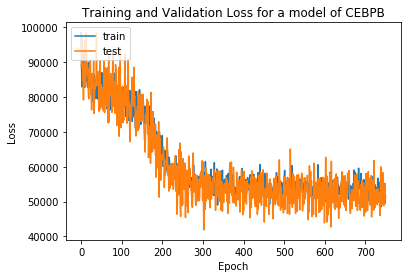

Looking at transcription factor: CTCF
Makeing generator for CTCF


732it [00:00, 7316.47it/s]

Number of training examples: 154902
Building itrtree


162209it [00:19, 8463.19it/s]


Writing hdf5 File
Finished positive training
Finished positive testing
Finished positive validation
Finished negative training
Finished negative testing
Finished negative validation
Wrote to file
Training model for CTCF
Convolutions used: [[32, 3], [32, 32], [16, 3], [8, 3]] [neurons, filter]
Created history pickle
Training loss for TFCTCF


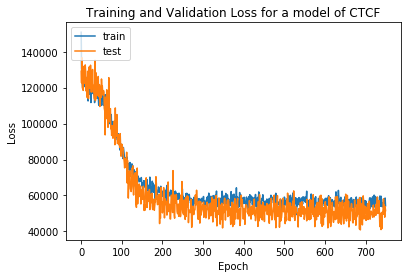

Looking at transcription factor: TAF1
Makeing generator for TAF1


598it [00:00, 5977.10it/s]

Number of training examples: 38786
Building itrtree


40355it [00:05, 7545.56it/s]


Writing hdf5 File
Finished positive training
Finished positive testing
Finished positive validation
Finished negative training
Finished negative testing
Finished negative validation
Wrote to file
Training model for TAF1
Convolutions used: [[32, 3], [32, 32], [16, 3], [8, 3]] [neurons, filter]
Created history pickle
Training loss for TFTAF1


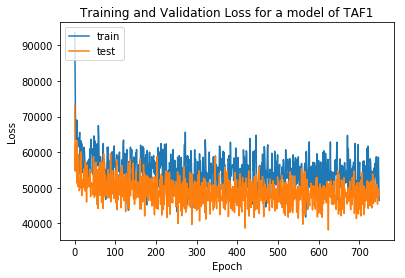

Looking at transcription factor: GABPA
Makeing generator for GABPA


845it [00:00, 8448.52it/s]

Number of training examples: 25918
Building itrtree


26985it [00:03, 8341.73it/s]


Writing hdf5 File
Finished positive training
Finished positive testing
Finished positive validation
Finished negative training
Finished negative testing
Finished negative validation
Wrote to file
Training model for GABPA
Convolutions used: [[32, 3], [32, 32], [16, 3], [8, 3]] [neurons, filter]
Created history pickle
Training loss for TFGABPA


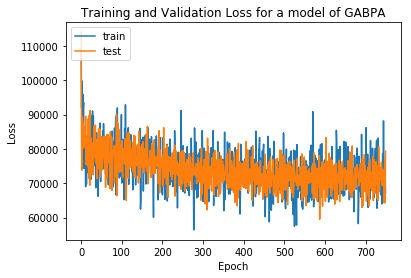

Looking at transcription factor: USF1
Makeing generator for USF1


812it [00:00, 8112.95it/s]

Number of training examples: 56043
Building itrtree


58534it [00:07, 8302.73it/s]


Writing hdf5 File
Finished positive training
Finished positive testing
Finished positive validation
Finished negative training
Finished negative testing
Finished negative validation
Wrote to file
Training model for USF1
Convolutions used: [[32, 3], [32, 32], [16, 3], [8, 3]] [neurons, filter]
Created history pickle
Training loss for TFUSF1


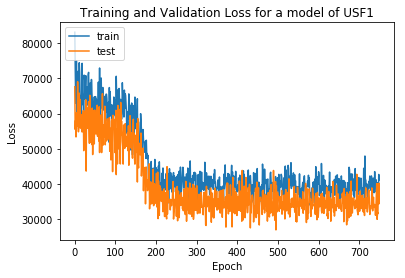

Looking at transcription factor: SP1
Makeing generator for SP1


900it [00:00, 8999.45it/s]

Number of training examples: 47112
Building itrtree


49005it [00:05, 8549.81it/s]


Writing hdf5 File
Finished positive training
Finished positive testing
Finished positive validation
Finished negative training
Finished negative testing
Finished negative validation
Wrote to file
Training model for SP1
Convolutions used: [[32, 3], [32, 32], [16, 3], [8, 3]] [neurons, filter]
Created history pickle
Training loss for TFSP1


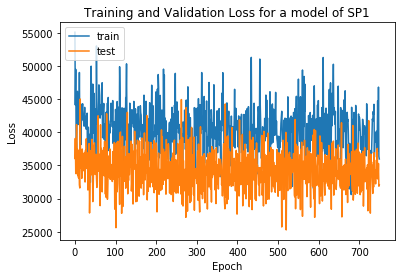

Looking at transcription factor: EGR1
Makeing generator for EGR1


845it [00:00, 8449.38it/s]

Number of training examples: 43338
Building itrtree


44985it [00:05, 7761.96it/s]


Writing hdf5 File
Finished positive training
Finished positive testing
Finished positive validation
Finished negative training
Finished negative testing
Finished negative validation
Wrote to file
Training model for EGR1
Convolutions used: [[32, 3], [32, 32], [16, 3], [8, 3]] [neurons, filter]
Created history pickle
Training loss for TFEGR1


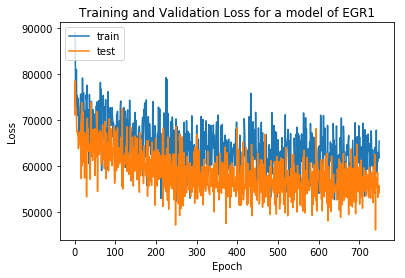

Looking at transcription factor: FOXA1
Makeing generator for FOXA1


846it [00:00, 8459.16it/s]

Number of training examples: 85525
Building itrtree


89906it [00:10, 8610.90it/s]


Writing hdf5 File
Finished positive training
Finished positive testing
Finished positive validation
Finished negative training
Finished negative testing
Finished negative validation
Wrote to file
Training model for FOXA1
Convolutions used: [[32, 3], [32, 32], [16, 3], [8, 3]] [neurons, filter]
Created history pickle
Training loss for TFFOXA1


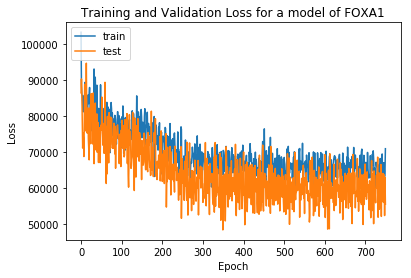

Looking at transcription factor: RUNX3
Makeing generator for RUNX3


858it [00:00, 8568.67it/s]

Number of training examples: 63251
Building itrtree


66222it [00:07, 8674.88it/s]


Writing hdf5 File
Finished positive training
Finished positive testing
Finished positive validation
Finished negative training
Finished negative testing
Finished negative validation
Wrote to file
Training model for RUNX3
Convolutions used: [[32, 3], [32, 32], [16, 3], [8, 3]] [neurons, filter]
Created history pickle
Training loss for TFRUNX3


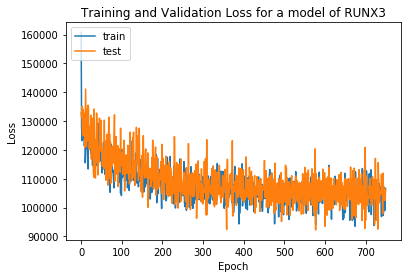

Looking at transcription factor: MAZ
Makeing generator for MAZ


888it [00:00, 8879.94it/s]

Number of training examples: 42356
Building itrtree


43914it [00:05, 8482.34it/s]


Writing hdf5 File
Finished positive training
Finished positive testing
Finished positive validation
Finished negative training
Finished negative testing
Finished negative validation
Wrote to file
Training model for MAZ
Convolutions used: [[32, 3], [32, 32], [16, 3], [8, 3]] [neurons, filter]
Created history pickle
Training loss for TFMAZ


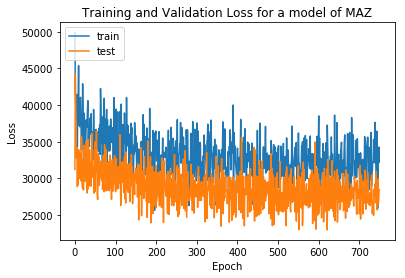

Looking at transcription factor: RAD21
Makeing generator for RAD21


826it [00:00, 8254.58it/s]

Number of training examples: 113510
Building itrtree


119039it [00:13, 8637.52it/s]


Writing hdf5 File
Finished positive training
Finished positive testing
Finished positive validation
Finished negative training
Finished negative testing
Finished negative validation
Wrote to file
Training model for RAD21
Convolutions used: [[32, 3], [32, 32], [16, 3], [8, 3]] [neurons, filter]
Created history pickle
Training loss for TFRAD21


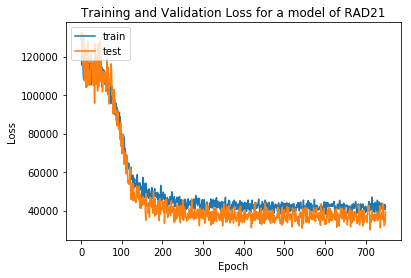

Looking at transcription factor: SMC3
Makeing generator for SMC3


903it [00:00, 9026.54it/s]

Number of training examples: 54254
Building itrtree


56772it [00:06, 9250.64it/s]


Writing hdf5 File
Finished positive training
Finished positive testing
Finished positive validation
Finished negative training
Finished negative testing
Finished negative validation
Wrote to file
Training model for SMC3
Convolutions used: [[32, 3], [32, 32], [16, 3], [8, 3]] [neurons, filter]
Created history pickle
Training loss for TFSMC3


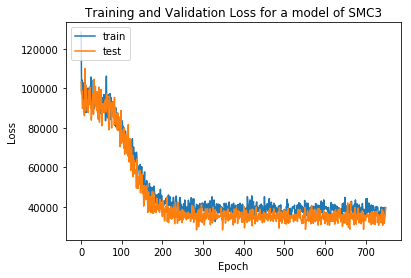

Looking at transcription factor: MAFF
Makeing generator for MAFF


893it [00:00, 8927.90it/s]

Number of training examples: 44917
Building itrtree


47076it [00:05, 8995.72it/s]


Writing hdf5 File
Finished positive training
Finished positive testing
Finished positive validation
Finished negative training
Finished negative testing
Finished negative validation
Wrote to file
Training model for MAFF
Convolutions used: [[32, 3], [32, 32], [16, 3], [8, 3]] [neurons, filter]
Created history pickle
Training loss for TFMAFF


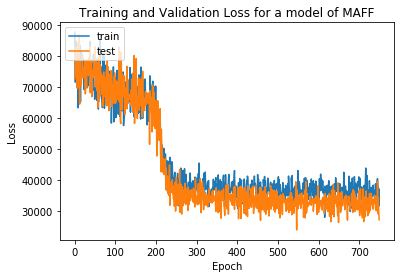

Looking at transcription factor: MAFK
Makeing generator for MAFK


832it [00:00, 8314.89it/s]

Number of training examples: 79971
Building itrtree


84087it [00:09, 8500.29it/s]


Writing hdf5 File
Finished positive training
Finished positive testing
Finished positive validation
Finished negative training
Finished negative testing
Finished negative validation
Wrote to file
Training model for MAFK
Convolutions used: [[32, 3], [32, 32], [16, 3], [8, 3]] [neurons, filter]
Created history pickle
Training loss for TFMAFK


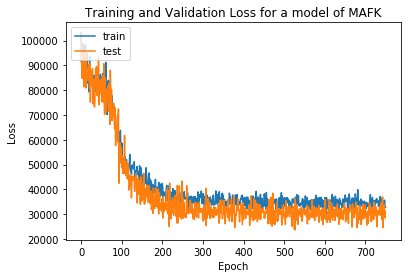

Looking at transcription factor: BHLHE40
Makeing generator for BHLHE40


895it [00:00, 8946.23it/s]

Number of training examples: 37257
Building itrtree


38801it [00:04, 9105.19it/s]


Writing hdf5 File
Finished positive training
Finished positive testing
Finished positive validation
Finished negative training
Finished negative testing
Finished negative validation
Wrote to file
Training model for BHLHE40
Convolutions used: [[32, 3], [32, 32], [16, 3], [8, 3]] [neurons, filter]
Created history pickle
Training loss for TFBHLHE40


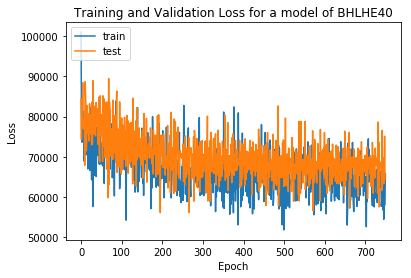

Looking at transcription factor: FOSL2
Makeing generator for FOSL2


889it [00:00, 8881.67it/s]

Number of training examples: 41406
Building itrtree


43464it [00:04, 9044.43it/s]


Writing hdf5 File
Finished positive training
Finished positive testing
Finished positive validation
Finished negative training
Finished negative testing
Finished negative validation
Wrote to file
Training model for FOSL2
Convolutions used: [[32, 3], [32, 32], [16, 3], [8, 3]] [neurons, filter]
Created history pickle
Training loss for TFFOSL2


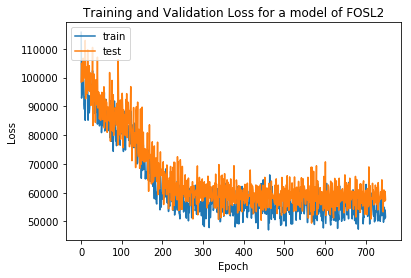

Looking at transcription factor: JUND
Makeing generator for JUND


871it [00:00, 8704.16it/s]

Number of training examples: 92999
Building itrtree


97411it [00:11, 8693.87it/s]


Writing hdf5 File
Finished positive training
Finished positive testing
Finished positive validation
Finished negative training
Finished negative testing
Finished negative validation
Wrote to file
Training model for JUND
Convolutions used: [[32, 3], [32, 32], [16, 3], [8, 3]] [neurons, filter]
Created history pickle
Training loss for TFJUND


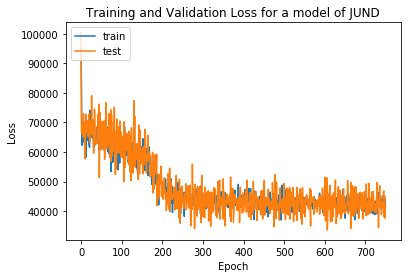

Looking at transcription factor: E2F6
Makeing generator for E2F6
Number of training examples: 24589
Only 24589 training samples
Looking at transcription factor: MAX
Makeing generator for MAX


879it [00:00, 8787.26it/s]

Number of training examples: 82541
Building itrtree


85949it [00:09, 9311.24it/s]


Writing hdf5 File
Finished positive training
Finished positive testing
Finished positive validation
Finished negative training
Finished negative testing
Finished negative validation
Wrote to file
Training model for MAX
Convolutions used: [[32, 3], [32, 32], [16, 3], [8, 3]] [neurons, filter]
Created history pickle
Training loss for TFMAX


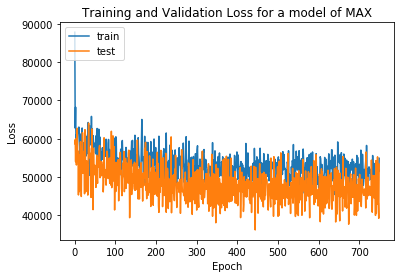

Looking at transcription factor: POLR2A
Makeing generator for POLR2A


795it [00:00, 7948.13it/s]

Number of training examples: 128619
Building itrtree


134990it [00:15, 8554.49it/s]


Writing hdf5 File
Finished positive training
Finished positive testing
Finished positive validation


ValueError: negative count

In [4]:
# make a folder system and get a generator and model for each
for TF in TFs:
    # make the folders
    print('Looking at transcription factor: ' + TF)
    timestr = time.strftime("%Y%m%d_%H%M%S")       
    out_path = os.path.join('/home/kal/TF_models/seq_only/seq_regression/encode_TFs/', timestr + '_' + TF)
    paths[TF] = out_path
    os.makedirs(out_path)
    gen_path = os.path.join(out_path, TF + '_gen.hdf5')
    # make the generator
    print('Makeing generator for ' + TF)
    try:
        seq_only_gen.create_from_bed(bed_path, gen_path, TF=TF, example_limit = 25000)        
        gens[TF] = seq_only_gen.TFGenerator(gen_path)
        print('Training model for ' + TF)
        # make and train the model
        train_seq_regression_convnet.make_model(out_path, '32.3_32.32_16.3_8.3', gen_path)
        ml_models[TF] = eval_TFmodel.TFmodel(out_path)
        # get training loss stuff
        print('Training loss for TF' + TF)
        for file in os.listdir(os.path.join(paths[TF], 'history')):
            file = os.path.join(os.path.join(paths[TF], 'history'), file)
            # find the history pickles
            if file.endswith('1.pk1'):
                with open(file, 'rb') as infile:
                    h1 = pickle.load(infile)
            elif file.endswith('2.pk1'):
                with open(file, 'rb') as infile:
                    h2 = pickle.load(infile)
            elif file.endswith('3.pk1'):
                with open(file, 'rb') as infile:
                    h3 = pickle.load(infile)
        # Summarize history for accuracy
        plt.plot(eval_TFmodel.group_stats('loss', h1, h2, h3))
        plt.plot(eval_TFmodel.group_stats('val_loss', h1, h2, h3))
        plt.title('Training and Validation Loss for a model of ' + TF)
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
    except IndexError as e:
        print(e)

In [ ]:
# plot the training loss curves
for TF in TFs:
    print('Training for TF' + TF)
    for file in os.listdir(os.path.join(paths[TF], 'history')):
        file = os.path.join(os.path.join(paths[TF], 'history'), file)
        # find the history pickles
        if file.endswith('1.pk1'):
            with open(file, 'rb') as infile:
                h1 = pickle.load(infile)
        elif file.endswith('2.pk1'):
            with open(file, 'rb') as infile:
                h2 = pickle.load(infile)
        elif file.endswith('3.pk1'):
            with open(file, 'rb') as infile:
                h3 = pickle.load(infile)
    # Summarize history for accuracy
    plt.plot(eval_TFmodel.group_stats('loss', h1, h2, h3))
    plt.plot(eval_TFmodel.group_stats('val_loss', h1, h2, h3))
    plt.title('Training and Validation Loss for a model of ' + TF)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [5]:
# make a frozen weight model for each pwm
pwm_models = dict()

for file in tqdm(os.listdir('/home/kal/TF_models/data/memes')):
    for TF in TFs:
        file = os.path.join('/home/kal/TF_models/data/memes', file)
        # find the meme file
        if file.endswith(TF + '.meme'):
            print('Making a pwm model for TF ' +  TF)
            pwm_model_path = os.path.join(paths[TF], TF + '_frozen.hdf5')
            print(file)
            # construct the frozen weight model
            weights = sequence.process_meme(file)[0].pwm
            weights = np.expand_dims(weights, axis=2)
            input = Input(batch_shape=(32, 256, 4))
            add_RC_to_batch = Lambda(lambda x: K.concatenate([x, x[:, ::-1, ::-1]], axis=0), output_shape=lambda s: (2 * s[0], s[1], s[2]))
            # convolution for the motif
            pwm_conv = Conv1D(1, weights.shape[0], padding='valid', input_shape=(256,4), weights=[weights, np.asarray([0])])
            pwm_conv.trainable = False
            max_by_direction = Lambda(lambda x: K.maximum(K.max(x[:x.shape[0]//2, :, :], axis=1), K.max(x[x.shape[0]//2:, ::-1, :], axis=1)), name='stackmax', output_shape=lambda s: (s[0] // 2, 1))
            predictions = max_by_direction(pwm_conv(add_RC_to_batch(input)))
            model = Model(inputs=[input], outputs=[predictions])
            # compile the network
            #optimizer = Adam(beta_1=0.95, lr=0.0005, epsilon=.1)
            #model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
            #save the network
            model.save(pwm_model_path)
            # add the model to the dictionary    
            pwm_models[TF] = eval_TFmodel.TFmodel(paths[TF], model_path = pwm_model_path)
            print('Made the model!')

  0%|          | 0/81 [00:00<?, ?it/s]

Making a pwm model for TF NFYA


KeyError: 'NFYA'

In [ ]:
# compare each pwm and deep learning model on the test dataset (atac later?)
# predict on test sequences and make a p-r and p-r gain curve
test_precision = dict()
test_recall = dict()

missing_memes = list()
for TF in TFs:
    try:
        print('Making a PR curve for ' + TF)
        g = gens[TF].pair_gen(mode='val')
        true_labels = list()
        reg_preds = list()
        pwm_preds = list()
        for i in tqdm(range(1000)):
            batch, labels = next(g)
            true_labels.append(labels)
            reg_preds.append(ml_models[TF].model.predict(batch))
            pwm_preds.append(pwm_models[TF].model.predict(batch))   
        true_labels = np.asarray(true_labels).flatten().tolist()
        reg_preds = np.asarray(reg_preds).flatten().tolist()
        pwm_preds = np.asarray(pwm_preds).flatten().tolist()
    
        #p-r curve
        pwm_p, pwm_r, pwm_t = precision_recall_curve(true_labels, pwm_preds, pos_label=1)
        reg_p, reg_r, reg_t = precision_recall_curve(true_labels, reg_preds, pos_label=1)
    
        #save the values
        test_precision[TF] = reg_p
        test_recall[TF] = reg_r
        test_precision[TF + '_PWM'] = pwm_p
        test_recall[TF + '_PWM'] = pwm_r

        plt.figure(figsize=(8,6))
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('P-R Curve for ' + TF + ' Binding via ENCODE dataset')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.plot(reg_r, reg_p, label='Regression Model')
        plt.plot(pwm_r, pwm_p, label='PWM Model')
        plt.legend()
        plt.show()
    
        #p-r gain gurve
        # we consider only p/r value between prop_pos and 1
        prop_pos = sum(true_labels)/len(true_labels)
        reg_pgain = [(x-prop_pos)/((1-prop_pos)*x) for x in reg_p]
        reg_rgain = [(x-prop_pos)/((1-prop_pos)*x) for x in reg_r]
        pwm_pgain = [(x-prop_pos)/((1-prop_pos)*x) for x in pwm_p]
        pwm_rgain = [(x-prop_pos)/((1-prop_pos)*x) for x in pwm_r]

        plt.figure(figsize=(8,6))
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('P-R Gain Curve for CTCF Binding via ENCODE dataset')
        plt.xlabel('Recall Gain')
        plt.ylabel('Precision Gain')
        plt.plot(pwm_rgain, pwm_pgain, label='PWM Model')
        plt.plot(reg_rgain, reg_pgain, label='Regression Model')
        plt.legend()
        plt.show()
    except KeyError:
        print('Woops no pwm model.')
        missing_memes.append(TF)

In [ ]:
AOC = dict()
for TF in ['CTCF']:
    # get aoc numbers!
    AOC[TF] = - trapz(test_precision[TF], test_recall[TF])
    AOC[TF + '_PWM'] = - trapz(test_precision[TF + '_PWM'], test_recall[TF + '_PWM'])

print(AOC['CTCF'])
print(AOC['CTCF_PWM'])

In [ ]:
pair = gen.pair_gen(strengths=True)